In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from collections import defaultdict
#import holoviews as hv #(pro vizualizaci) 
from scipy.spatial import distance
import openpyxl
import itertools

In [2]:
# Import data From file
#all data and a couple of unique values in each column

df = pd.read_csv(r'D:\A_CVUT_FEL\Bakalarska_prace\security_event_data.csv')
print('all the data we have :', len(df['eventTitle']))
print(len(df['eventId'].unique()))
print(len(df['eventTitle'].unique()))
print(len(df['assetId'].unique()))

all the data we have : 887199
181
132
4932


# Part 1
We are looking if one 'eventTitle' has more than one 'eventId'. 
We have assumed that if more than one 'eventId' per 'eventTitle', it could be seen as some kind of suspicious action.

In [31]:
#df.groupby('eventTitle').eventId.nunique().to_dict()

idForTitle = df.drop_duplicates().set_index('eventId')['eventTitle'].to_dict()
values=idForTitle.values()
countIdforTitle=dict(Counter(values))
#Counter(values)

#the first column is the name of the eventTitle. 
#The second is the number of how many IDs belong to that eventTitle.

Events, with lots of eventId :

In [32]:
maxx=0
for i in countIdforTitle:
    if countIdforTitle[i]>1:
        print(i, countIdforTitle[i])
        if maxx < countIdforTitle[i]:
            maxx =countIdforTitle[i]
            r=i

print('Event with a large number of different IDs is:' , r, maxx)

Unusual file extension 2
Known malicious hostnames 3
Commands that run scripts 2
Usage of wmic 2
Unusual execution directory 2
Non-user activity 9
Anomalous destination 18
Repetitive requests or burst 3
TLS inconsistency 4
Unexpected application 5
HTTP to ip address 2
Unexpected user destination 4
Inconsistent user time activity 5
Anomalous http 2
Event with a large number of different IDs is: Anomalous destination 18


# histogram
relating to the first part. 
The x-axis is the name of the eventTitle.
The y-axis is the number of Ids.

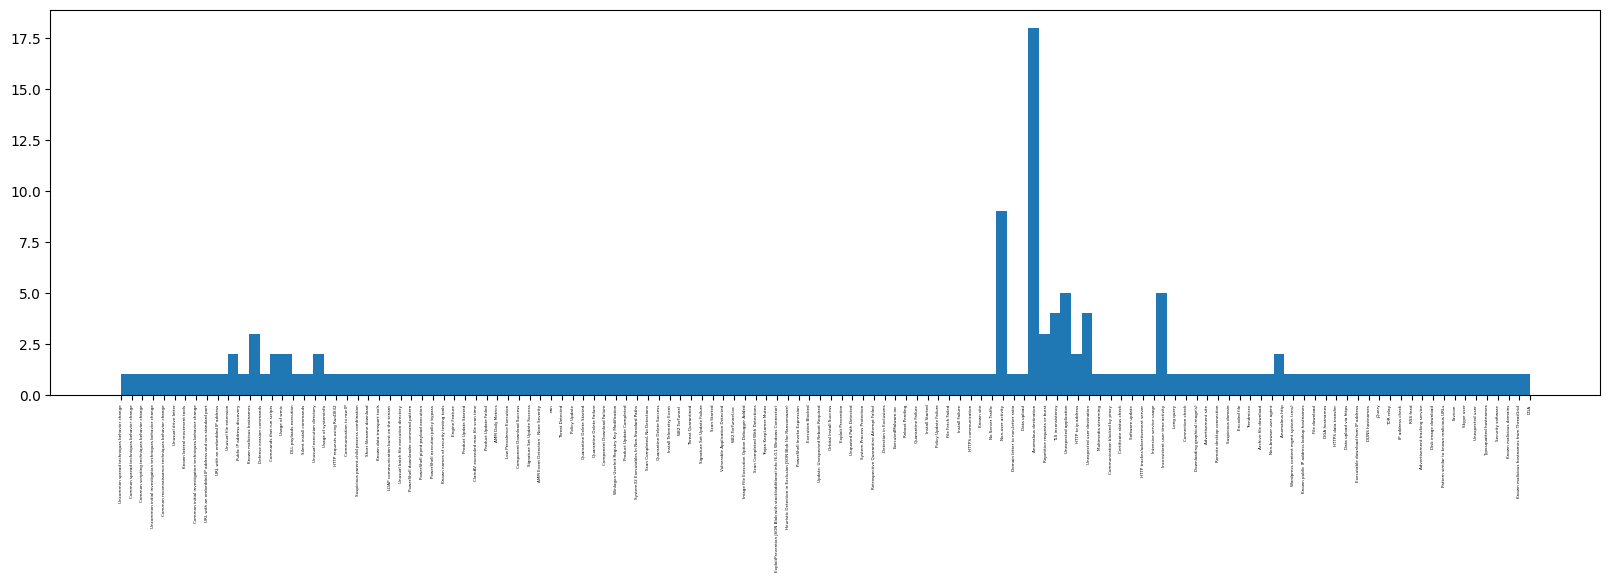

In [95]:
mylist=[key for key, val in countIdforTitle.items() for _ in range(val)]
fig, ax=plt.subplots(figsize=(20,5))
plt.hist(mylist, bins=132)
plt.xticks(fontsize=3, rotation=90)

#plt.bar(countIdforTitle.keys(), countIdforTitle.values(), color='g')
plt.show()

# Part 2
Еhe occurrence number of all the different 'eventsTitles' in the data. 

In [33]:
mainEventTitle = dict(Counter(df['eventTitle']))
#Counter(df['eventTitle'])


# Histogram
The x-axis is the name of the eventTitle.
The y-axis is the occurrences number of eventTitles.

In [49]:
mylist=[key for key, val in mainEventTitle.items() for _ in range(val)]
fig, ax=plt.subplots(figsize=(20,5))
plt.hist(mylist, bins=132)
plt.xticks(fontsize=3, rotation=90)
plt.show()

The average of the number of eventTitles occurrences. 

In [90]:
average=0
for i in mainEventTitle:
    average+=mainEventTitle[i]
average=average/len(mainEventTitle)
print(average)

6721.204545454545


All events that have more than the average occurrence value 

In [91]:
maxx=0
for i in mainEventTitle:
    if mainEventTitle[i]>average:
        print(i, mainEventTitle[i])
        if maxx < mainEventTitle[i]:
            maxx =mainEventTitle[i]
            r=i
print('The main eventTitle is:', r, maxx)

Product Update Started 7151
ClamAV exceeded max file scan time 10770
Product Update Failed 7078
Quarantine Delete Started 16898
Quarantine Delete Success 13649
HTTPS communication 177248
Known site 208838
No Server Traffic 10513
Non-user activity 54927
Domain letter to non‐letter ratio 69767
Data upload 6820
Anomalous destination 132513
TLS inconsistency 13733
Unexpected application 61637
Multimedia streaming 11998
Communication blocked by proxy 17323
Inconsistent user time activity 11221
The main eventTitle is: Known site 208838


# Part 3
Vocabulary with meanings from when we have been observing each eventTitle.

In [3]:
dictionary = df.groupby('eventTitle')['from'].unique().to_dict()
#dictionary=defaultdict(list)
#for i,j in enumerate(df['eventTitle']):
    #if (df.loc[i, 'from']) not in dictionary[j]:
        #dictionary[j].append(df.loc[i, 'from'])

Vocabulary with meanings to when we have been observing each eventTitle.

In [57]:
dictionary2 = df.groupby('eventTitle').to.unique().to_dict()

In [58]:
minus=0
dictionary3=defaultdict(list)
for i in dictionary2:
    for j, jj in enumerate (dictionary2[i]):
        minus=dictionary2[i][j]-dictionary[i][j]
        dictionary3[i].append(minus)

How long did the eventTitles last.

In [60]:
notNullTime =defaultdict(list)
for i in dictionary3:
    if len(dictionary3[i])!=1:
        if(all(x==dictionary3[i][0] for x in dictionary3[i]))==False :
                    notNullTime[i].append(dictionary3[i])
        else:
            if 0 not in dictionary3[i]:
                notNullTime[i].append(dictionary3[i])
    else: 
        if dictionary3[i]!=[0]:
            notNullTime[i].append(dictionary3[i])


Null data :

In [61]:
a= df[df['eventTitle'].isnull()]


,Unnamed: 0,eventId,eventTitle,assetId,sourceId,startDay,from,to
4402,42,NaN,NaN,6ec42d4b-d012-3737-8886-b885ae03636f,endpoint-2,20230119,1674087191000,1674087191000
4441,81,NaN,NaN,b8ed3d07-787c-3fde-acaf-85acd35cb19c,endpoint-2,20230119,1674087956000,1674087956000
4445,85,NaN,NaN,3404e56d-36ba-3dd9-a1ed-9355835fcbf8,endpoint-2,20230119,1674088084000,1674088084000
4509,149,NaN,NaN,3e7b91a8-9321-35c9-ac46-ef5fb59124c4,endpoint-2,20230119,1674088921000,1674088921000
4608,248,NaN,NaN,524c863e-2505-3a14-9610-afadd78013fe,endpoint-2,20230119,1674090776000,1674090776000
...,...,...,...,...,...,...,...,...
804779,5683,NaN,NaN,e43ce0ea-a769-3675-b738-87cddbe671d7,network-1,20230119,1674164100000,1674164400000
821570,441,NaN,NaN,e43ce0ea-a769-3675-b738-87cddbe671d7,network-1,20230119,1674164100000,1674164400000
846528,3347,NaN,NaN,e43ce0ea-a769-3675-b738-87cddbe671d7,network-1,20230119,1674162900000,1674163200000
860988,17807,NaN,NaN,e43ce0ea-a769-3675-b738-87cddbe671d7,network-1,20230119,1674164400000,1674164700000


# Part 4
Which eventTitles relate to which 'sourceId'. We have three in 'sourceId' (endpoint1-1, endpoint-2, network-1).

In [62]:
countSourseId = dict(Counter(df['sourceId']))
Counter(df['sourceId'])

Counter({'endpoint-1': 4360, 'endpoint-2': 76756, 'network-1': 806083})

In [63]:
dictionary4 = df.groupby('eventTitle').sourceId.unique().to_dict()

All events that lasted longer than 0 millisecond were extracted from the network-1.

In [64]:
for i in notNullTime:
    print(i, dictionary4[i])

Advertisement site ['network-1']
Advertisement tracking service ['network-1']
Anomalous destination ['network-1']
Anomalous http ['network-1']
Archive file download ['network-1']
Certificate status check ['network-1']
Communication blocked by proxy ['network-1']
Connection check ['network-1']
DDNS hostnames ['network-1']
DGA ['network-1']
DGA hostnames ['network-1']
Data upload ['network-1']
Data upload via https ['network-1']
Disk image download ['network-1']
Domain letter to non‐letter ratio ['network-1']
Encoded file ['network-1']
Executable download from IP address ['network-1']
Favicon ['network-1']
File download ['network-1']
HTTP to ip address ['network-1']
HTTP tracker/advertisement server ['network-1']
HTTPS communication ['network-1']
HTTPS data transfer ['network-1']
IP address check ['network-1']
Inconsistent user time activity ['network-1']
Intensive service usage ['network-1']
Known malicious domains ['network-1']
Known malicious hostnames ['endpoint-1' 'network-1']
Known

# Part 5
How many different assetIds, and which eventTitles relate to them.

In [3]:
countSourceId = df.groupby('assetId').eventTitle.nunique().to_dict()
#countSourceId

In [7]:
average=0
for i in countSourceId:
    average+=countSourceId[i]
average=average/len(countSourceId)
print(average)

6.317518248175182


In [35]:
maxx=0
for i in countSourceId:
    if countSourceId[i]>average:
        #print(i, countSourceId[i])
        if maxx < countSourceId[i]:
            maxx =countSourceId[i]
            r=i
print('The assetId which have more then average eventTitle is:', r, maxx)

The assetId which have more then average eventTitle is: b8368210-4879-3d5b-8247-2746b956109e 28


In [4]:
oneEncodedVector = df.groupby('assetId').eventTitle.unique().to_dict()
#oneEncodedVector

In [5]:
uniqueAssets = df['assetId'].unique()

In [6]:
uniqueEventTitle = df['eventTitle'].unique()

In [7]:
dicct=defaultdict(list)
for i in uniqueAssets:
    for j in uniqueEventTitle:
        if j in oneEncodedVector[i]: dicct[i].append(1)
        else: dicct[i].append(0)


# Part 6
Prepare a dataset in the form of one-hot-encoded vector for each asset.


In [8]:
dfDicct = pd.DataFrame(dicct)

In [11]:
distance1= pd.DataFrame(dicct).T

A few examples where I show the difference between the appropriate distance measures 

# Euclidean distance

In [38]:
print(distance.euclidean(dfDicct.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], dfDicct.loc['80531c37-618b-3066-99a7-d0349fa083ca']))
print(distance.euclidean(dfDicct.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], dfDicct.loc['c18a550f-9172-3de8-a75d-1cb3833ac35a']))
print(distance.euclidean(dfDicct.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], dfDicct.loc['a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee']))
print(distance.euclidean(dfDicct.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], dfDicct.loc['3033624b-558c-3dd3-bb03-cbf255c25198']))


2.8284271247461903
3.3166247903554
3.1622776601683795
2.8284271247461903


# Manhattan distance


In [18]:
print(distance.cityblock(distance1.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], distance1.loc['80531c37-618b-3066-99a7-d0349fa083ca']))
print(distance.cityblock(distance1.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], distance1.loc['c18a550f-9172-3de8-a75d-1cb3833ac35a']))
print(distance.cityblock(distance1.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], distance1.loc['a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee']))
print(distance.cityblock(distance1.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], distance1.loc['3033624b-558c-3dd3-bb03-cbf255c25198']))

8
11
10
8


In [13]:
dfDicct.loc[['8b65448f-96b2-314a-bd1f-23569a1a6144', 'c18a550f-9172-3de8-a75d-1cb3833ac35a']]

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
8b65448f-96b2-314a-bd1f-23569a1a6144,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c18a550f-9172-3de8-a75d-1cb3833ac35a,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Chebyshev distance

In [17]:
dist12=distance.chebyshev(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['80531c37-618b-3066-99a7-d0349fa083ca']))
dist13=distance.chebyshev(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['c18a550f-9172-3de8-a75d-1cb3833ac35a']))
dist14=distance.chebyshev(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee']))
dist15=distance.chebyshev(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['3033624b-558c-3dd3-bb03-cbf255c25198']))


In [18]:
print(dist12, dist13, dist14, dist15)

1 1 1 1


# Canberra distance

In [19]:
dist12=distance.canberra(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['80531c37-618b-3066-99a7-d0349fa083ca']))
dist13=distance.canberra(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['c18a550f-9172-3de8-a75d-1cb3833ac35a']))
dist14=distance.canberra(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee']))
dist15=distance.canberra(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['3033624b-558c-3dd3-bb03-cbf255c25198']))


In [20]:
print(dist12, dist13, dist14, dist15)

8.0 11.0 10.0 8.0


# Cosine similarity

In [23]:
dist12=distance.cosine(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['80531c37-618b-3066-99a7-d0349fa083ca']))
dist13=distance.cosine(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['c18a550f-9172-3de8-a75d-1cb3833ac35a']))
dist14=distance.cosine(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee']))
dist15=distance.cosine(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['3033624b-558c-3dd3-bb03-cbf255c25198']))


In [24]:
print(dist12, dist13, dist14, dist15)

0.7958758547680684 1.0 0.7113248654051871 0.5669872981077807


# Euclidean distance

In [17]:
#import itertools
dictDistanceE = defaultdict()
for i, j in itertools.combinations(dfDicct, 2):
    dictDistanceE[i,j] = distance.euclidean(dfDicct[i], dfDicct[j])

In [19]:
max(dictDistance.values())

7.280109889280518

In [20]:
list(dictDistance.keys())[list(dictDistance.values()).index(7.280109889280518)]

('b8368210-4879-3d5b-8247-2746b956109e',
 '6457ed88-d031-3e9d-90b3-7e0432ccff20')

In [21]:
min(dictDistance.values())

0.0

In [22]:
list(dictDistance.keys())[list(dictDistance.values()).index(0.0)]

('80531c37-618b-3066-99a7-d0349fa083ca',
 '04283d5d-f70c-3463-8baf-8adff83053af')

# Manhattan 

In [9]:
import itertools
dictDistanceM = defaultdict()
for i, j in itertools.combinations(dfDicct, 2):
    dictDistanceM[i,j] = distance.cityblock(dfDicct[i], dfDicct[j])
#15 minut

In [10]:
max(dictDistanceM.values())

53

In [11]:
keys_with_value_53 = [key for key, value in dictDistanceM.items() if value == 53]
keys_with_value_53

[('b8368210-4879-3d5b-8247-2746b956109e',
  '6457ed88-d031-3e9d-90b3-7e0432ccff20')]

In [13]:
keys_with_value_50 = [key for key, value in dictDistanceM.items() if value >=50]
keys_with_value_50

[('b8368210-4879-3d5b-8247-2746b956109e',
  '948a3f63-4b7f-3eb5-91b9-159875b0d6a6'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  '70fc4e4e-d7ff-3852-a590-0a9467539f1a'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  '80b26beb-a1fb-31cb-986c-976093db405c'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  'b6c9b26f-774a-3cc2-a997-68034aef94f1'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  'd05c4442-0e77-3748-8204-5b4a13e985f0'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  '8e954949-9868-39f4-b7e1-4e60026df64b'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  'd4a03bb6-c83a-3083-a4f3-889d3eed1143'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  'cf2db902-d573-39d7-9804-0d43697bfe29'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  '69b4966f-57d8-3b61-9870-ac28808a5847'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  '3011e2da-76f2-3db4-9138-e5a000c9dc85'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  'c8fb7073-d994-3518-ba6a-41792a88eb04'),
 ('b8368210-4879-3d5b-8247-2746b956109e',
  '84cc19d2-7ebd-3755-b

# Jakardova

In [8]:
dictDistanceJ=defaultdict()

In [24]:
import itertools
dictDistanceJ = defaultdict()
for i, j in itertools.combinations(dfDicct, 2):
    dictDistanceJ[i,j] = distance.jaccard(dfDicct[i], dfDicct[j])

In [25]:
max(dictDistanceJ.values())

1.0

In [27]:
keys_with_value_1 = [k for k, v in dictDistanceJ.items() if v == 1]
keys_with_value_1

[('8b65448f-96b2-314a-bd1f-23569a1a6144',
  'c18a550f-9172-3de8-a75d-1cb3833ac35a'),
 ('8b65448f-96b2-314a-bd1f-23569a1a6144',
  '90890c45-34f2-378d-94fe-54a4d99599e8'),
 ('8b65448f-96b2-314a-bd1f-23569a1a6144',
  '2faab378-242e-3281-8b07-ff0b8d1e0721'),
 ('8b65448f-96b2-314a-bd1f-23569a1a6144',
  '43656a5b-0869-34d8-98fb-890869458d3f'),
 ('8b65448f-96b2-314a-bd1f-23569a1a6144',
  'abe3316a-234c-3f77-b251-b824cbccebe3'),
 ('8b65448f-96b2-314a-bd1f-23569a1a6144',
  '674912ea-6404-335a-b063-989d323fb335'),
 ('8b65448f-96b2-314a-bd1f-23569a1a6144',
  '16341a8c-d338-318b-a3bc-e105974a5fbd'),
 ('8b65448f-96b2-314a-bd1f-23569a1a6144',
  '6d98fc92-cd9f-3430-9a02-59eaf63804f6'),
 ('8b65448f-96b2-314a-bd1f-23569a1a6144',
  'dc145d74-5bc8-3ca5-a07b-ebe92bfb7cb7'),
 ('8b65448f-96b2-314a-bd1f-23569a1a6144',
  'bdccde81-300c-345e-b5d6-4ca24c1af3ba'),
 ('8b65448f-96b2-314a-bd1f-23569a1a6144',
  'b8384514-7f21-3f0a-8c87-0a42b32654d1'),
 ('8b65448f-96b2-314a-bd1f-23569a1a6144',
  '148d7932-6f69-3e44-a

<Axes: >

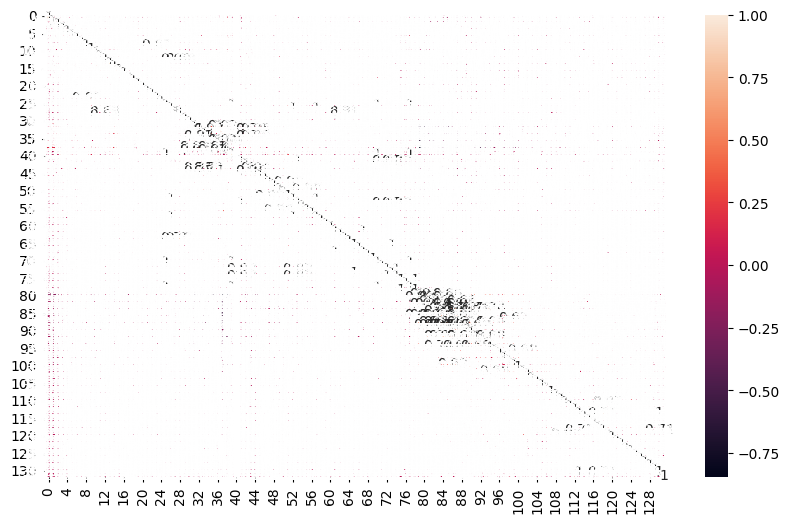

In [13]:

import seaborn as sns

# Calculate the correlation coefficient between different variables
cor =distance1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot =True)


In [20]:
cor[cor>0.6].to_csv('correlation06.csv')

In [18]:
cor

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,1.000000,0.108729,0.016787,0.031600,0.055281,0.006207,0.074207,-0.004354,-0.006160,0.025247,...,-0.005028,-0.003555,-0.005028,-0.005623,-0.006160,-0.003555,-0.002513,-0.002513,-0.002513,-0.004354
1,0.108729,1.000000,0.084311,0.025941,0.047183,0.042000,0.010518,-0.005045,0.022494,0.016541,...,-0.005827,-0.004119,-0.005827,-0.006515,-0.007138,-0.004119,-0.002912,-0.002912,-0.002912,-0.005045
2,0.016787,0.084311,1.000000,-0.003959,-0.002503,-0.012448,0.029469,-0.003066,-0.004337,0.017567,...,-0.003540,-0.002503,-0.003540,-0.003959,-0.004337,-0.002503,-0.001770,-0.001770,-0.001770,-0.003066
3,0.031600,0.025941,-0.003959,1.000000,-0.000642,0.125289,0.028106,0.257623,-0.001112,0.115776,...,-0.000908,-0.000642,-0.000908,-0.001015,-0.001112,-0.000642,-0.000454,-0.000454,-0.000454,-0.000786
4,0.055281,0.047183,-0.002503,-0.000642,1.000000,-0.002018,-0.003886,-0.000497,-0.000703,-0.002178,...,-0.000574,-0.000406,-0.000574,-0.000642,-0.000703,-0.000406,-0.000287,-0.000287,-0.000287,-0.000497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,-0.003555,-0.004119,-0.002503,-0.000642,-0.000406,-0.002018,-0.003886,-0.000497,-0.000703,-0.002178,...,-0.000574,-0.000406,-0.000574,-0.000642,-0.000703,1.000000,-0.000287,-0.000287,-0.000287,0.407958
128,-0.002513,-0.002912,-0.001770,-0.000454,-0.000287,-0.001427,-0.002748,-0.000351,-0.000497,-0.001540,...,-0.000406,-0.000287,-0.000406,-0.000454,-0.000497,-0.000287,1.000000,-0.000203,-0.000203,-0.000351
129,-0.002513,-0.002912,-0.001770,-0.000454,-0.000287,-0.001427,-0.002748,-0.000351,-0.000497,-0.001540,...,-0.000406,-0.000287,-0.000406,-0.000454,-0.000497,-0.000287,-0.000203,1.000000,-0.000203,-0.000351
130,-0.002513,-0.002912,-0.001770,-0.000454,-0.000287,-0.001427,-0.002748,-0.000351,-0.000497,-0.001540,...,-0.000406,-0.000287,-0.000406,-0.000454,-0.000497,-0.000287,-0.000203,-0.000203,1.000000,-0.000351


In [12]:
distance1

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
8b65448f-96b2-314a-bd1f-23569a1a6144,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80531c37-618b-3066-99a7-d0349fa083ca,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c18a550f-9172-3de8-a75d-1cb3833ac35a,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3033624b-558c-3dd3-bb03-cbf255c25198,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23a4c5b4-20ad-330b-981c-8a0954e75d07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a618da6a-902e-3854-b2cc-a7a4fd16437e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00a7bc31-b8f7-30e5-b22c-b20669a07b9b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6b2f4636-eb56-3158-b3f1-88869bbf7ec0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
